## Import Libraries

In [48]:
# Scientific
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# MAchine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,\
                            recall_score,\
                            accuracy_score,\
                            f1_score,\
                            confusion_matrix,\
                            ConfusionMatrixDisplay,\
                            classification_report


## Load Dataset

In [49]:
data = pd.read_csv(r'../data/cancer patient data sets.csv')

## Data Exploration & Preproccessing

In [50]:
data.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [51]:
# lowercase all feature names
data.rename(str.lower, axis='columns', inplace=True)

In [52]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [53]:
data.columns

Index(['index', 'patient id', 'age', 'gender', 'air pollution', 'alcohol use',
       'dust allergy', 'occupational hazards', 'genetic risk',
       'chronic lung disease', 'balanced diet', 'obesity', 'smoking',
       'passive smoker', 'chest pain', 'coughing of blood', 'fatigue',
       'weight loss', 'shortness of breath', 'wheezing',
       'swallowing difficulty', 'clubbing of finger nails', 'frequent cold',
       'dry cough', 'snoring', 'level'],
      dtype='object')

In [54]:
# Drop redundant features
data.drop(['index', 'patient id', ], axis=1, inplace=True)

In [55]:
data.shape

(1000, 24)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air pollution             1000 non-null   int64 
 3   alcohol use               1000 non-null   int64 
 4   dust allergy              1000 non-null   int64 
 5   occupational hazards      1000 non-null   int64 
 6   genetic risk              1000 non-null   int64 
 7   chronic lung disease      1000 non-null   int64 
 8   balanced diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive smoker            1000 non-null   int64 
 12  chest pain                1000 non-null   int64 
 13  coughing of blood         1000 non-null   int64 
 14  fatigue                  

In [57]:
np.unique(data.Level, return_counts=True)

AttributeError: 'DataFrame' object has no attribute 'Level'

In [ ]:
sns.countplot(data=data, x='level')
plt.show()

In [58]:
data.replace({'level':{'Low': 1, 'Medium': 2, 'High': 3}}, inplace=True)

In [59]:
data.describe()

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


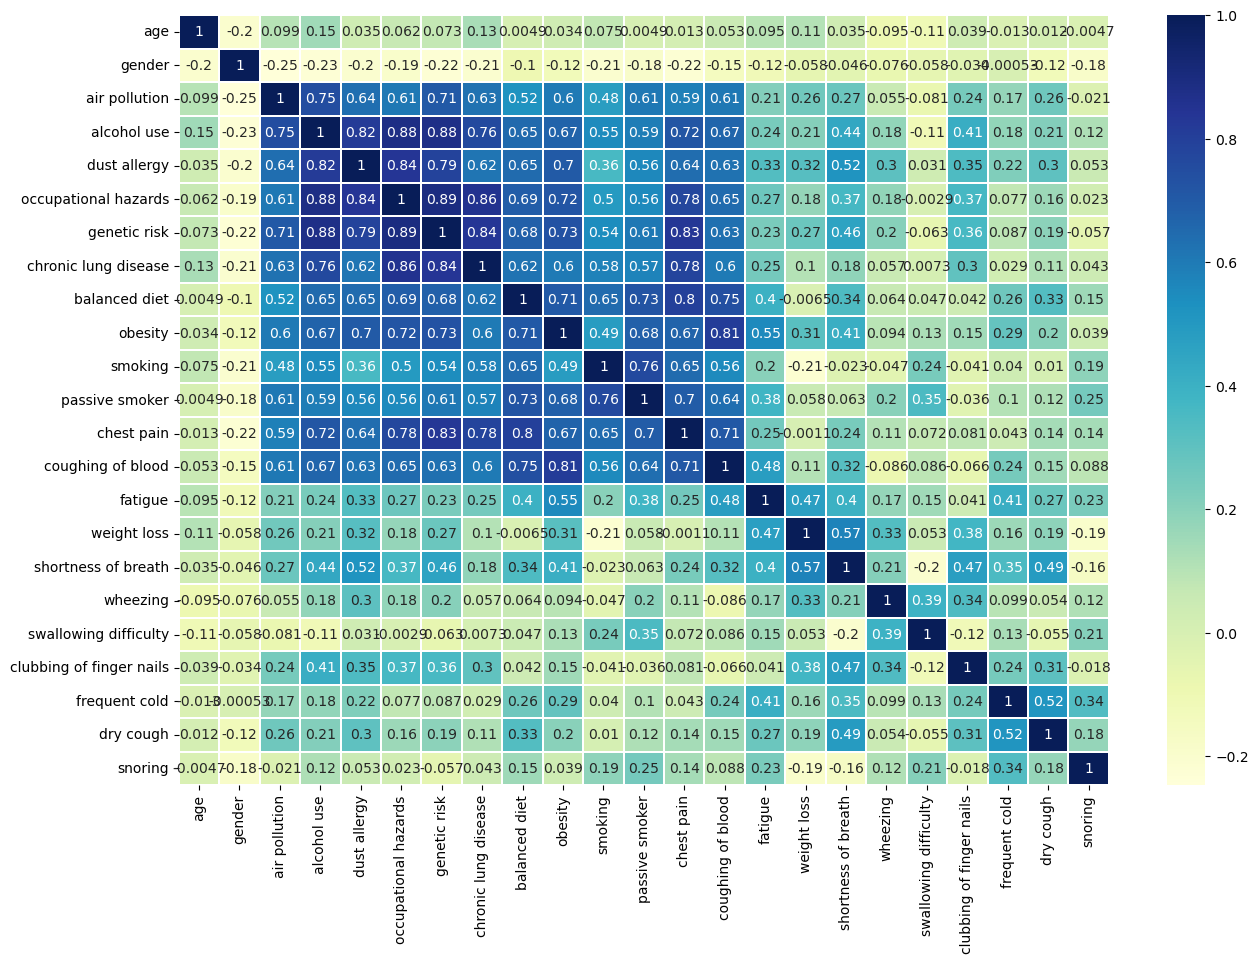

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop('level', axis=1).corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [61]:
np.unique(data['air pollution'], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([141, 201, 173,  90,  20, 326,  30,  19]))

In [62]:
np.unique(data['alcohol use'], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([152, 202,  80,  41,  90,  80, 167, 188]))

## Train Test Split

In [63]:
X = data.drop('level', axis=1)
y = data.level

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

## Fit Model

### Logistic regression

In [65]:
lr_model = LogisticRegression(solver='liblinear')
_ = lr_model.fit(X_train,y_train)

In [66]:
y_pred_lr = lr_model.predict(X_test)

In [75]:
lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of LogisticRegression: {lr_acc}")

lr_precision = precision_score(y_test, y_pred_lr, average = 'micro')
print(f"Precision of LogisticRegression: {lr_precision}")

lr_recall = recall_score(y_test, y_pred_lr, average = 'micro')
print(f"Recall of LogisticRegression: {lr_recall}")

lr_f1 = f1_score(y_test, y_pred_lr, average = 'micro')
print(f"F1 of LogisticRegression: {lr_f1}")

print('\n__________________Classification Report__________________')
print(classification_report(y_test, y_pred_lr))

Accuracy of LogisticRegression: 0.9866666666666667
Precision of LogisticRegression: 0.9866666666666667
Recall of LogisticRegression: 0.9866666666666667
F1 of LogisticRegression: 0.9866666666666668

__________________Classification Report__________________
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        91
           2       1.00      0.96      0.98       100
           3       1.00      1.00      1.00       109

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



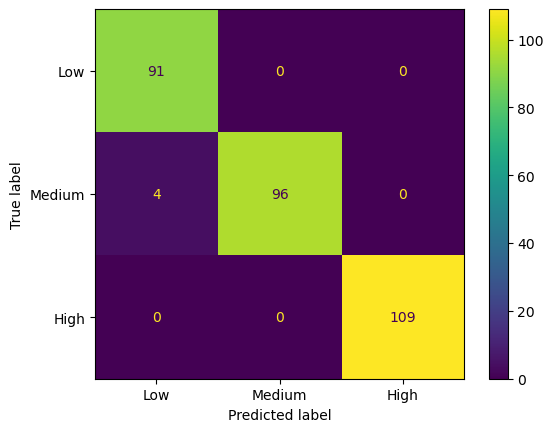

In [76]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr), display_labels=['Low', 'Medium', 'High'])
cm.plot()
plt.show()

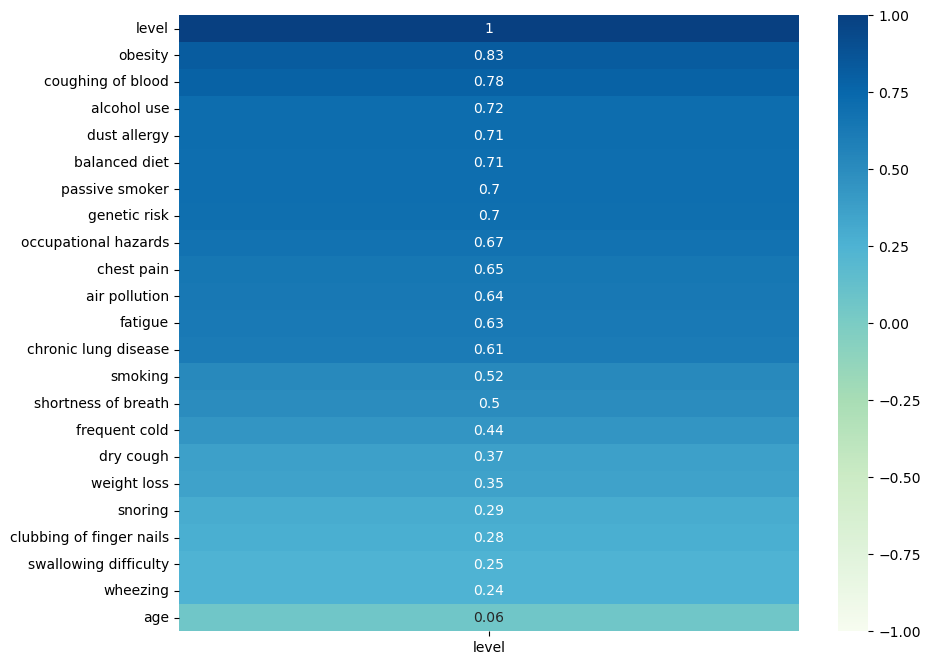

In [78]:
top_correlations = data.corr()[['level']].sort_values(by='level', ascending=False).head(23)

plt.figure(figsize=(10, 8))  
sns.heatmap(top_correlations, vmin=-1, vmax=1, annot=True, cmap='GnBu')
plt.show()

## Decision Tree Classifier